# Introduction to Prophet model

In [1]:
import pandas as pd
from prophet import Prophet

In [2]:
import chardet

# Detect the encoding
with open(r"C:\Users\eDominer\Python Project\Sales Prediction\sales_data_sample.csv", 'rb') as f:
    result = chardet.detect(f.read())

# Use the detected encoding to read the file
encoding = result['encoding']

In [3]:
#Loading Dataset
df = pd.read_csv('sales_data_sample.csv', encoding=encoding)
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
df['ds']=pd.to_datetime(df['ORDERDATE'])
df['y']=df['SALES']

In [5]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,ds,y
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,NYC,NY,10022,USA,NaN,Yu,Kwai,Small,2003-02-24,2871.00
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small,2003-05-07,2765.90
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,2003-07-01,3884.34
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium,2003-08-25,3746.70
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium,2003-10-10,5205.27


In [6]:

m = Prophet()
m.fit(df)

17:18:35 - cmdstanpy - INFO - Chain [1] start processing
17:18:37 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
612,2006-05-27
613,2006-05-28
614,2006-05-29
615,2006-05-30
616,2006-05-31


In [8]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
612,2006-05-27,3859.769540,1546.288398,6412.907632
613,2006-05-28,3919.932390,1639.344929,6309.902810
614,2006-05-29,3893.405415,1645.054452,6346.992513
615,2006-05-30,4101.146667,1598.709696,6489.254434
616,2006-05-31,3858.180387,1356.005307,5977.176345


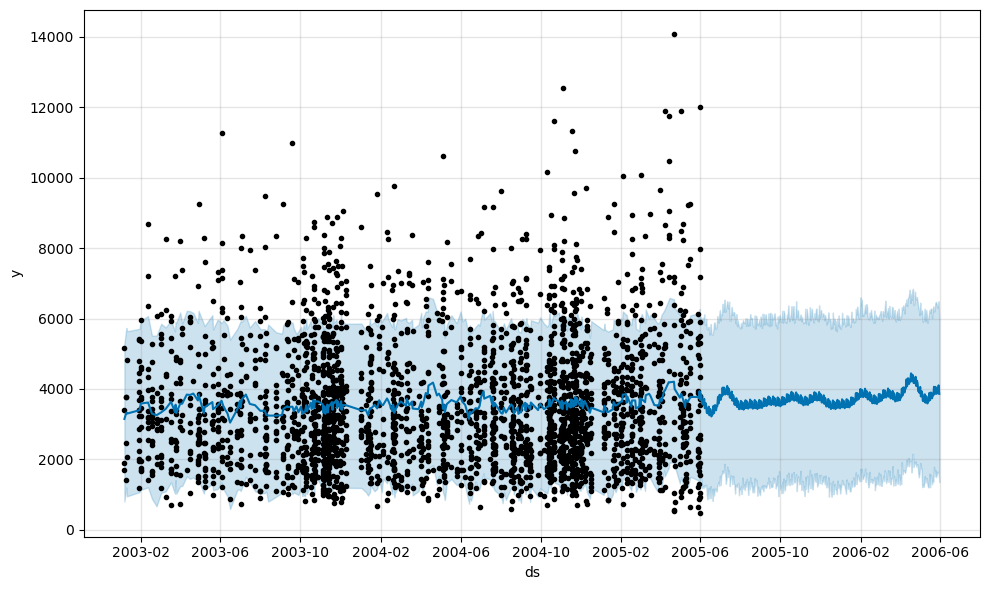

In [9]:
fig1 = m.plot(forecast)

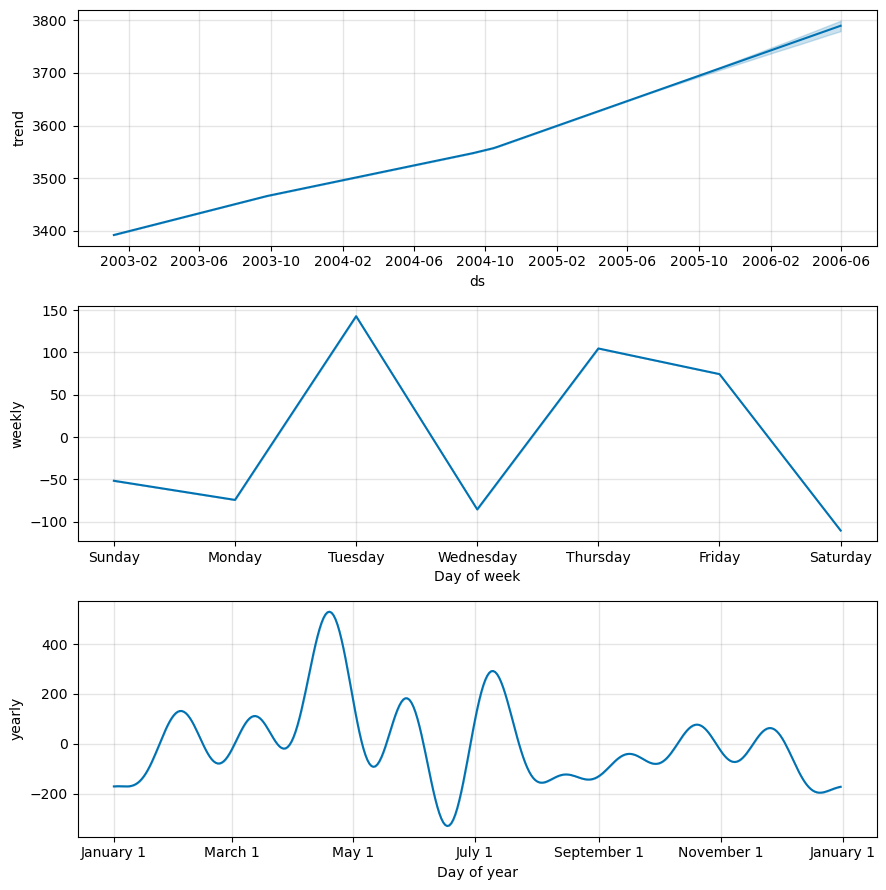

In [10]:
fig2 = m.plot_components(forecast)

In [11]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [12]:
plot_components_plotly(m, forecast)

c:\Users\eDominer\anaconda3\Lib\site-packages\plotly\io\_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.

